In [1]:
!pip install statsmodels

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6 -m pip install --upgrade pip' command.


In [2]:
import numpy as np 
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline

In [4]:
sp.stats.binom.pmf(k=1, n=2, p=0.5)

0.5

In [5]:
np.random.seed(1)
sp.stats.binom.rvs(n=10, p=0.2, size=5)

array([2, 3, 0, 1, 1])

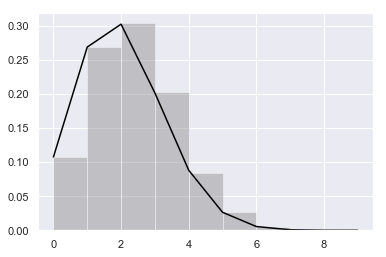

In [11]:
binomial = sp.stats.binom(n=10, p=.2)
np.random.seed(1)
rvs_binomial = binomial.rvs(size=10000)
m = np.arange(0,10,1)
pmf_binomial = binomial.pmf(k=m)
sns.distplot(rvs_binomial,bins=m,kde=False,norm_hist=True,color='gray',)
plt.plot(m,pmf_binomial,color='black')

In [12]:
sp.stats.poisson.pmf(k=2, mu=5)

0.08422433748856832

In [14]:
np.random.seed(1)
sp.stats.poisson.rvs(mu=2,size=5)

array([2, 1, 0, 1, 2])

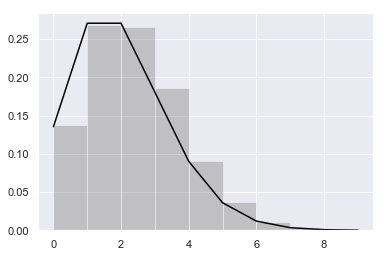

In [16]:
poisson = sp.stats.poisson(mu=2)
np.random.seed(1)
rvs_poisson = poisson.rvs(size=10000)
pmf_poisson = poisson.pmf(k=m)
sns.distplot(rvs_poisson, bins = m, kde = False, norm_hist = True, color = 'gray')
plt.plot(m, pmf_poisson, color='black')

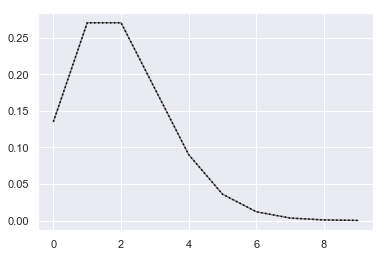

In [18]:
N = 100000000
p = 0.00000002
binomial_2 = sp.stats.binom(n=N,p=p)
pmf_binomial_2 = binomial_2.pmf(k=m)
plt.plot(m,pmf_poisson,color='gray')
plt.plot(m,pmf_binomial_2, color='black',linestyle='dotted')

In [19]:
# chapter3

In [20]:
test_result = pd.read_csv('sample/6-3-1-logistic-regression.csv')
print(test_result.head(3))

   hours  result
0      0       0
1      0       0
2      0       0


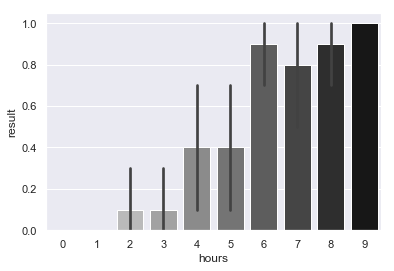

In [27]:
sns.barplot(x='hours',y='result',data=test_result,palette='gray_r') # 95%信頼区間

In [22]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7f83724b2378>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    variables.
    
    

In [28]:
print(test_result.groupby('hours').mean())

       result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


In [31]:
mod_glm = smf.glm(formula='result ~ hours', data=test_result, family=sm.families.Binomial()).fit()

In [32]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sun, 22 Nov 2020   Deviance:                       68.028
Time:                        17:37:12   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

In [34]:
mod_glm_null = smf.glm(
'result~1',data=test_result, family=sm.families.Binomial()).fit()

In [36]:
print(mod_glm_null.aic.round(3))
print(mod_glm.aic.round(3))

139.989
72.028


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


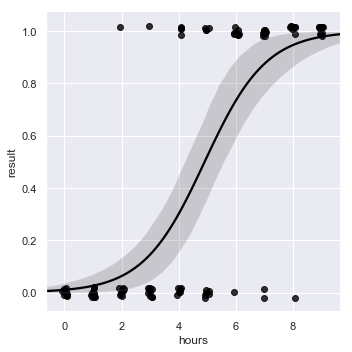

In [37]:
sns.lmplot(x='hours', y='result', data=test_result,logistic=True,scatter_kws={'color':'black'}, line_kws = {'color':'black'}, x_jitter=0.1, y_jitter=0.02)

In [38]:
exp_val = pd.DataFrame({
    'hours':np.arange(0,10,1)
})
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

In [39]:
exp_val_1 = pd.DataFrame({'hours':[1]})
pred_1 = mod_glm.predict(exp_val_1)

In [40]:
exp_val_2 = pd.DataFrame({'hours':[2]})
pred_2 = mod_glm.predict(exp_val_2)

In [41]:
odds_1 = pred_1 / (1-pred_1)
odds_2 = pred_2 / (1-pred_2)
sp.log(odds_2/odds_1)

array([0.929])

In [42]:
mod_glm.params['hours']

0.9288901756284946

In [43]:
sp.exp(mod_glm.params['hours'])

2.5316978778757737

In [44]:
# chapter4

In [46]:
test_result = pd.read_csv('sample/6-3-1-logistic-regression.csv')
mod_glm = smf.glm('result ~ hours', data=test_result, family=sm.families.Binomial()).fit()

In [48]:
pred = mod_glm.predict()
y = test_result.result

In [50]:
pearson_resid = (y-pred)/sp.sqrt(pred*(1-pred))
pearson_resid.head(3)

0   -0.102351
1   -0.102351
2   -0.102351
Name: result, dtype: float64

In [51]:
sp.sum(mod_glm.resid_pearson**2)

84.91138782569973

In [52]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sun, 22 Nov 2020   Deviance:                       68.028
Time:                        18:44:03   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

In [53]:
mod_glm.pearson_chi2

84.91138782569973

In [55]:
pred = mod_glm.predict()
y = test_result.result
resid_tmp = 0 - sp.log(sp.stats.binom.pmf(k=y,n=1,p=pred))
deviance_resid = sp.sqrt(2*resid_tmp)*np.sign(y-pred)
deviance_resid.head(3)

0   -0.144369
1   -0.144369
2   -0.144369
Name: result, dtype: float64

In [56]:
mod_glm.resid_deviance.head(3)

0   -0.144369
1   -0.144369
2   -0.144369
dtype: float64

In [57]:
sp.sum(mod_glm.resid_deviance**2)

68.02788118117269

In [58]:
# chapter5

In [60]:
beer = pd.read_csv('sample/6-5-1-poisson-regression.csv')
print(beer.head(3))

   beer_number  temperature
0            6         17.5
1           11         26.6
2            2          5.0


In [61]:
mod_pois = smf.glm('beer_number ~ temperature', beer, family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Sun, 22 Nov 2020   Deviance:                       5.1373
Time:                        18:54:25   Pearson chi2:                     5.40
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

In [62]:
mod_pois_null = smf.glm(
'beer_number ~ 1', data=beer,
family=sm.families.Poisson()).fit()

In [63]:
print(mod_pois_null.aic.round(3))
print(mod_pois.aic.round(3))

223.363
119.343


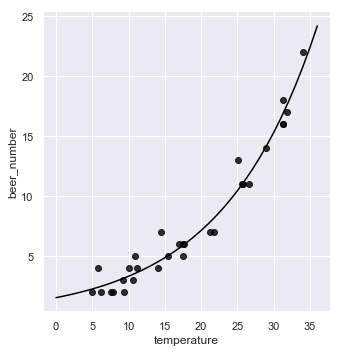

In [65]:
x_plot = np.arange(0,37)
pred = mod_pois.predict(
pd.DataFrame({'temperature':x_plot}))
sns.lmplot(y='beer_number',x='temperature',data=beer,fit_reg=False,scatter_kws={'color':'black'})
plt.plot(x_plot, pred, color='black') # seabornではポアソン回帰はプロットできない

In [72]:
exp_val_1 = pd.DataFrame({'temperature':[1]})
pred_1 = mod_pois.predict(exp_val_1)
exp_val_2 = pd.DataFrame({'temperature':[2]})
pred_2 = mod_pois.predict(exp_val_2)

In [73]:
pred_2 / pred_1

0    1.079045
dtype: float64

In [74]:
sp.exp(mod_pois.params['temperature'])

1.079045054586893